# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [78]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]


# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data


meanss = np.mean(housing_features, axis = 0)
print meanss.astype(int)

    
print "Boston Housing dataset loaded successfully!"

[  3  11  11   0   0   6  68   3   9 408  18 356  12]
Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [79]:
# Number of houses in the dataset
total_houses   = np.count_nonzero(housing_prices)

# Number of features in the dataset
total_features = city_data.data.shape[1]

# Minimum housing value in the dataset
minimum_price  = np.amin(city_data.target)

# Maximum housing value in the dataset
maximum_price  = np.amax(city_data.target)

# Mean house value of the dataset
mean_price     = np.average(city_data.target)

# Median house value of the dataset
median_price   = np.median(city_data.target)

# Standard deviation of housing values of the dataset
std_dev        = np.std(city_data.target)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
1. CRIM (crime rate by town)
2. DIS (distance to employment centers within Boston)
3. inverse.B (proportion of blacks by town)


## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
[[**11.95**, 0.0, 18.1, 0, 0.659, 5.609, 90.0, **1.385**, 24, 680.0, 20.2, **332.09**, 12.13]]

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [87]:
# Put any import statements you need for this code block here
import sklearn.metrics as sk


def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data

    X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.30, random_state=1)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **

While our goal is to train a model on the dataset features, we don't want to use 100% of it, which could lead to overfitting and will not leave us an independent set of data to test our model upon. So we can do normal splits ranging from 60/40 for smaller sets, to around 80 or higher for larger ones. 

There are also other methods that can be used such as: Cross-validation, k-fold, leave-one-out.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [88]:
# Put any import statements you need for this code block here
import sklearn.metrics as sk


def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = sk.mean_squared_error(y_true, y_predict)
    print error
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

0.0
Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **

*Mean Squared Error (MSE)* is the standard for measuring models such as these and is what I plan on using. If the pricing were categorical and placed the prices in a set amount of buckets, the first 4 *Accuracy, Precision, Recall, *and* F1 Score* could work, but I doubt I will get any spot-on correct predictions of the price with those metrics, as it will be hard to guess the price precisely. 

So something that measures *how close* I get to the correct price would be best here, and I will chose MSE over MAE as I would like to punish more extreme differences from the true value from what the model predicted.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [89]:
# Put any import statements you need for this code block
from sklearn import grid_search as gs
from sklearn import metrics as m


def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = m.make_scorer(m.mean_squared_error, greater_is_better = False)

    # Make the GridSearchCV object
    reg = gs.GridSearchCV(regressor,parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

A *Grid Search* is a method of parameter runing for a learning algorithm. It is simple in that it just goes through various manually input parameter options and finds the most ideal set of parameter inputs for the model. 

It can be used when a model is being created for the first time or you are unsure of the parameters to choose, and instead let the computer do the work for you.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

*Cross-Validation* is a method of sampling the original training data where you can create multiple new combinations of said training/testing data. It can help avoid issues over over-fitting by helping the model generalize on more combinations of data. 

When using optimizing parameters during an application of grid search, the model can tend begin to overfit on the training data, as information can leak back if there is only one static division of training/validation. So cross-validation is useful when grid search is being used to run multiple model fittings, though it can become computationally expensive on larger data sets or when training many parameters.



# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .
0.0
98.3224342105
8.03729166667
84.7365497076
21.8544761905
70.7667991407
23.1092339545
61.1647255042
22.6923214286
72.2093682029
28.4026718147
72.1955344791
28.2421861472
72.5744462346
44.6502208014
63.3395175803
40.5614915254
63.259452924
39.2708912072
57.7902117413
35.883516116
57.7762710498
38.3001368243
57.7035356075
37.9522341045
57.7507873792
38.463155418
57.719004389
40.2347602827
60.748646112
41.9236826629
60.7703621456
42.9111832252
60.6826006721
43.8054770249
60.7831630425
43.1595830153
60.8720775391
43.0599659974
53.1418584726
43.4140491641
53.1057795338
43.4483012342
53.1070069404
42.6289119167
53.1125756047
41.3856158326
53.1541356251
40.4582730389
53.1481182331
40.0343493947
53.1558947019
40.3570943276
53.235242432
39.5149471983
53.2333562489
39.5835361386
53.1771623394
41.3269090732
53.1803770546
40.9301296962
53.1292070883
40.0715566388
53.1591725519
39.5024007757
53.1584572394
39.8995693132
53.23902

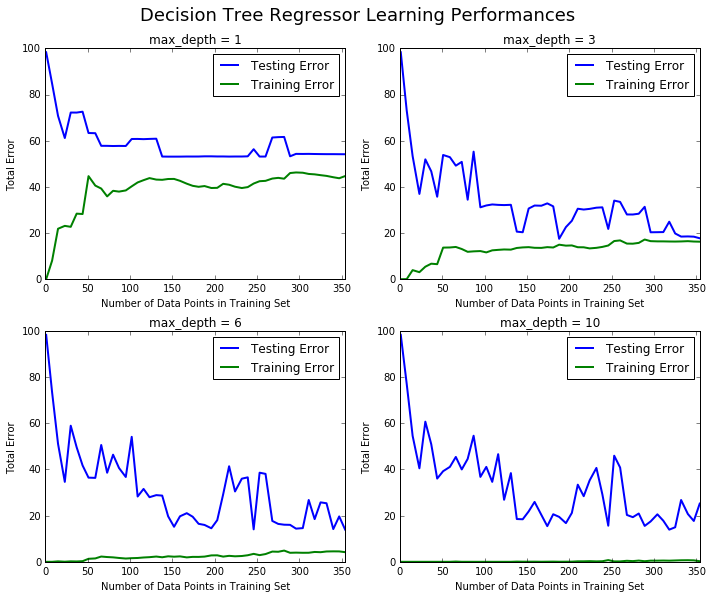

In [96]:
learning_curves(X_train, y_train, X_test, y_test)

In [92]:
print np.mean(X_train)
print np.mean(X_test)

70.2535487766
69.650669914


## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

In the graph on the bottom-right, with *max_depth = 10*, you can see the training model becoming very effecient **on the training data** but over-fitting and creating more error on the testing set. 

You can see the error begin decreasing significantly in the beginning, but it quickly gets to a point where there seems to be no advantage gained by adding more training data. Around a training size of 150 seems to be a good compromise of performance and simplicity of the model.


## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

Starting at *max_depth = 1*, it is a very generalized model, with a high bias with a high error, but it is fairly steady and consistent with the training and test datasets.

Then when you look at *max_depth = 10* there seems to be no advantage to this model over some of the others with less depth. It will have more variance as it tries to overfit on the training data, and the scoring error will eventually begin to go back up with more data being introduced.

Creating a model complexity graph. . . 
44.6808032477
54.1464733818
26.3461372216
25.6217609916
16.2582331003
17.7389846107
9.2767538123
12.4018317397
6.29491207432
12.5828713978
4.17594595812
26.2970092964
2.26401885362
18.4153406758
1.16828332015
17.9257211597
0.533463238033
17.5869859709
0.256793181708
29.4054732437
0.119861803059
13.5367634128
0.0359806967985
11.7056836806
0.00532519504977
20.2893079425


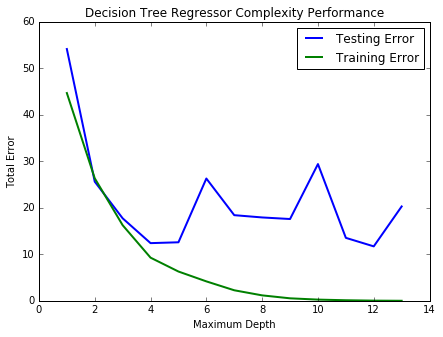

In [93]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **


The *Training Error* seems to have a very smooth exponential curve that converges close to 0 training error, while the *Testing Error* seems to settle once you reach around *max_depth = 4*. Though *max_depth = 8-10* do seem to be slightly better in error rates, it is not by much and the added complexity and computation does not seem to be worth it.

If it is much more computationally expensive to reach higher depths, then it may be more effecient to train your model on as low a depth as possible, while still retaining almost the lowest error. This can become especially important as we get more data to train on and it becomes harder to compute.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [94]:
x = []
for i in range(1000):
    x.append(reg.get_params()['max_depth'])
    
print "Final model has an optimal max_depth parameter of", int(np.mean(x))

Final model has an optimal max_depth parameter of 6


**Answer: **


It is mostly the same opinion I came to above, though I did see slightly less testing error with a *max_depth = 6-8*. I actually thought that with more data the ideal *max_depth* would actually have gone up.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [95]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **

The predicted price is 21.630, which seems to be just below both the average selling price and median.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

Without comparing my model to other methods, it is hard to quantify how this performs relative to something else, or say whether it is *good* or *bad*. But from eyeballing everything it does seem to line up with the mean of the features and subsequently the mean of the price of house.

Columns: RM, AGE, TAX, PTRATIO, and B are all similar in values to the mean of our dataset. And that makes sense in that our modeled price is also similar to the calculated mean of our dataset.

So from this point, I would use it up until the point I discover something better.